# Jigsaw Toxic Comment Classification (2018)
> Built a toxic comments sentiment analysis model using Fastai2

**Dataset Link:** https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview

In [1]:
# imports
from fastai2.text.all import *

import warnings
warnings.filterwarnings('ignore')

### Dataset Download

In [2]:
%cd ~/Desktop/datasets
dataset = 'jigsaw-toxic-comment-classification-challenge'
# !mkdir {dataset}
%cd {dataset}
# !kaggle competitions download -c {dataset}

/home/harish3110/Desktop/datasets
/home/harish3110/Desktop/datasets/jigsaw-toxic-comment-classification-challenge


In [3]:
# !ls
# !unzip {dataset + '.zip'}

In [4]:
# !rm {dataset + '.zip'} 

### Basic EDA

In [5]:
%cd ~/Desktop/datasets/jigsaw-toxic-comment-classification-challenge
!ls

/home/harish3110/Desktop/datasets/jigsaw-toxic-comment-classification-challenge
models	sample_submission.csv  test.csv  test_labels.csv  train.csv


In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_labels = pd.read_csv('test_labels.csv')

In [7]:
train.head() 

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_ar...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [8]:
train['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [9]:
test.head()

,id,comment_text
0,00001cee341fdb12,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [10]:
print(len(train))
print(len(test))

159571
153164


In [11]:
test_labels['toxic'].value_counts()

-1    89186
 0    57888
 1     6090
Name: toxic, dtype: int64

### Creating datsets for fine-tuning and classification 

For fine-tuning the language model we can employ this trick of taking all the data i.e. `comment_texts` we have at our disposal. Thus we can even consider test file here since the labels aren't required

In [12]:
# Considering only text and toxic columns in train

train = train[['comment_text', 'toxic']].copy()
train.columns = ['text', 'label']
train.head()

,text,label
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_ar...",0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0


In [13]:
train['is_valid'] = 0
train.head()

,text,label,is_valid
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_ar...",0,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,0


In [14]:
test_labels = test_labels[['id', 'toxic']].copy()
test_labels.head()

,id,toxic
0,00001cee341fdb12,-1
1,0000247867823ef7,-1
2,00013b17ad220c46,-1
3,00017563c3f7919a,-1
4,00017695ad8997eb,-1


In [15]:
test = pd.merge(test, test_labels, on='id').drop('id', axis=1)
test.head()

,comment_text,toxic
0,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,",-1
1,"== From RfC == \n\n The title is fine as it is, IMO.",-1
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """,-1
3,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message.",-1
4,I don't anonymously edit articles at all.,-1


In [16]:
test.columns = ['text', 'label']

In [17]:
test['is_valid'] = 1

In [18]:
# dataset for fine-tuning language model
df_lm = pd.concat([train, test], axis=0)
df_lm.head()

,text,label,is_valid
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_ar...",0,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,0


In [19]:
# test dataset for classification task
# Since the test set has labels as '-1' which isn'y used fo the gradation. 
test_cls = test[~test['label']== -1].copy()
test_cls['is_valid'] = 1
test_cls.head()

,text,label,is_valid
5,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,1
7,:Dear god this site is horrible.,0,1
11,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,0,1
13,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,1
14,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,1


In [20]:
# Dataset for classifier task with validation labelling using column 'is_valid'
df_cls = pd.concat([train, test_cls], axis=0)
df_cls.head()

,text,label,is_valid
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_ar...",0,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,0


In [21]:
# Classifier dataset distribution of train and validation
df_cls['is_valid'].value_counts()

0    159571
1     57888
Name: is_valid, dtype: int64

### Creating Dataloader

Creating a dataloader for self-supervised learning task which tries to predict the next word in a sequence as represented by `text_` below. 

Fastai handles text processing steps like tokenization and numericalization internally when `TextBlock` is passed to `DataBlock`

In [22]:
dls_lm = DataBlock(
    blocks=TextBlock.from_df('text', is_lm=True),
    get_x=ColReader('text'), 
    splitter=RandomSplitter(0.1) # using only 10% of entire comments data for validation inorder to learn more
)

In [23]:
dls_lm = dls_lm.dataloaders(df_lm, bs=64, seq_len=80)

# select bs mostly based on how much your GPU can handle without running out of memory

In [24]:
dls_lm.show_batch(max_n=3)

,text,text_
0,"xxbos "" \n\n xxmaj xxunk 's comments are from a xxunk biographical sketch introducing some of xxmaj rydberg 's poems in her book , xxmaj the xxmaj north ! xxmaj to the xxmaj north ! xxmaj her observations regarding xxmaj rydberg 's sexuality are very plausibly interwoven with her account of his childhood , marital issues , and writing . xxmaj she concludes that "" "" sven xxmaj xxunk and xxmaj victor xxmaj xxunk were certainly correct that xxmaj rydberg",""" \n\n xxmaj xxunk 's comments are from a xxunk biographical sketch introducing some of xxmaj rydberg 's poems in her book , xxmaj the xxmaj north ! xxmaj to the xxmaj north ! xxmaj her observations regarding xxmaj rydberg 's sexuality are very plausibly interwoven with her account of his childhood , marital issues , and writing . xxmaj she concludes that "" "" sven xxmaj xxunk and xxmaj victor xxmaj xxunk were certainly correct that xxmaj rydberg was"
1,": / / en.wikipedia.org / w / xxunk xxrep 3 7 & xxunk \n summerphd 's revert ] above , i see that you that did n't mention the xxmaj mayo xxmaj clinic source ( this one ) . xxmaj it 's also worth noting that the debated paragraph had been removed and restored two weeks before you removed xxunk : / / en.wikipedia.org / w / xxunk ] xxbos "" \n\n▁ = = eddie xxmaj adams photo== \n▁ [","/ / en.wikipedia.org / w / xxunk xxrep 3 7 & xxunk \n summerphd 's revert ] above , i see that you that did n't mention the xxmaj mayo xxmaj clinic source ( this one ) . xxmaj it 's also worth noting that the debated paragraph had been removed and restored two weeks before you removed xxunk : / / en.wikipedia.org / w / xxunk ] xxbos "" \n\n▁ = = eddie xxmaj adams photo== \n▁ [ https"
2,"have existed on wikipedia for over 4 years you are encouraging such stub articles which do nt have single citations . xxmaj as an admin , its my request that you must consider deleting those articles as they have remain as it is without citations for xxunk xxbos xxmaj thanks for letting me know about signing . xxmaj i 'll try harder . xxmaj i 've made my points and others have had their say also . xxmaj the article","existed on wikipedia for over 4 years you are encouraging such stub articles which do nt have single citations . xxmaj as an admin , its my request that you must consider deleting those articles as they have remain as it is without citations for xxunk xxbos xxmaj thanks for letting me know about signing . xxmaj i 'll try harder . xxmaj i 've made my points and others have had their say also . xxmaj the article is"


### Fine-tuning Language Model

Fine-tuning Wikitext 103 based LM to toxic comments dataset using ULMFiT methodologies. This fine-tuned LM can thus be used as the base to classify toxic texts in the next step. 

In [25]:
#fine-tuning wikitext LM to Jigsaw dataset

learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()]).to_fp16()

In [26]:
learn.load('learner')

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.10000000149011612)

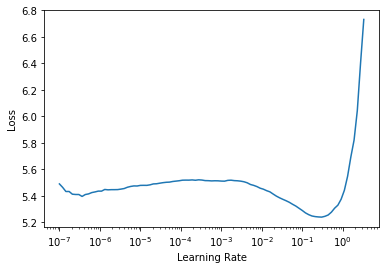

In [28]:
learn.lr_find()

Let's train the last layer of the model using a learning rate of `1e-2` based on the above learning rate finder plot using Leslie Smith's [1 Cycle Training](https://arxiv.org/abs/1708.07120) approach.

In [29]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.022997,3.779822,0.331399,43.808258,15:22


In [30]:
# Save for later ease of use
learn.save('1epoch')

In [26]:
learn = learn.load('1epoch')

Now train the entire model after unfreezing all the layers

In [27]:
learn.unfreeze()

In [ ]:
# learn.lr_find()

In [28]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.714566,3.496516,0.365180,33.000263,16:04
1,3.604150,3.443364,0.372944,31.292059,16:08
2,3.478880,3.406443,0.378410,30.157772,16:05
3,3.541979,3.382690,0.381952,29.449877,16:15
4,3.423829,3.367516,0.384422,29.006372,16:07
5,3.387651,3.355525,0.386115,28.660641,16:07
6,3.309172,3.343452,0.388299,28.316708,16:07
7,3.297806,3.337287,0.389445,28.142670,16:07
8,3.254500,3.335034,0.389722,28.079348,16:09
9,3.304389,3.335266,0.389804,28.085863,16:07


Once we have fine-tuned out LM to our downstream task, we save the encoder part of the model which is all of our model except the final layer that converts activations to probabilities of picking each token in our vocabulary. 

We can then use this encoder part as our base to build a toxic comment classification model. 

In [29]:
# Saving the encoder
learn.save_encoder('finetuned_toxic_2018')

### Text Generation

**Disclaimer**: The generated text will be toxic.

In [30]:
TEXT = "go to hell"
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]

In [31]:
print("\n".join(preds))

go to hell : : This is a BLP policy . You make it sound like an rfc to me , in which case you can do it . It should be Iraq War ,
go to hell , man 

 Hell loser . :::: Do n't tell me why you think i should try to be a troll . You 're not creating a wiki - war , i am told


### Training the classifier

#### Creating the classifier dataloader

Ensure that the sequence length and vocab passed to the `TextBlock` is same as that given while fine-tuning LM 

In [26]:
df_cls['label'].value_counts()

0    202165
1     15294
Name: label, dtype: int64

In [27]:
blocks = (TextBlock.from_df('text', seq_len=dls_lm.seq_len, vocab=dls_lm.vocab), CategoryBlock())
dls = DataBlock(blocks=blocks,
                get_x=ColReader('text'),
                get_y=ColReader('label'),
                splitter=RandomSplitter(0.3))

In [28]:
dls = dls.dataloaders(train, bs=64)

In [29]:
dls.show_batch(max_n=3)

,text,category
0,xxbos xxmaj take that ! \n\n xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass,1
1,xxbos xxup you xxup fucking xxup kike ! xxup do n't xxup edit xxup things xxup you xxup have xxup no xxup idea xxup about ! xxup give xxup credit xxup where xxup it 's xxup due ! xxup you xxup fucking xxup kike ! xxup do n't xxup edit xxup things xxup you xxup have xxup no xxup idea xxup about ! xxup give xxup credit xxup where xxup it 's xxup due ! xxup you xxup fucking xxup kike ! xxup do n't xxup edit xxup things xxup you xxup have xxup no xxup idea xxup about ! xxup give xxup credit xxup where xxup it 's xxup due ! xxup you xxup fucking xxup kike ! xxup do n't xxup edit xxup things xxup you xxup have xxup no xxup idea xxup about ! xxup give xxup credit xxup where xxup it 's xxup due ! xxup,1
2,xxbos xxrep 3 ' jforget xxup fuck xxup you xxup faggot xxup gay xxup ass xxup chink xxup nigger xxup cocksucking xxup piece xxup of xxup shit jforget xxup fuck xxup you xxup faggot xxup gay xxup ass xxup chink xxup nigger xxup cocksucking xxup piece xxup of xxup shit jforget xxup fuck xxup you xxup faggot xxup gay xxup ass xxup chink xxup nigger xxup cocksucking xxup piece xxup of xxup shit jforget xxup fuck xxup you xxup faggot xxup gay xxup ass xxup chink xxup nigger xxup cocksucking xxup piece xxup of xxup shit jforget xxup fuck xxup you xxup faggot xxup gay xxup ass xxup chink xxup nigger xxup cocksucking xxup piece xxup of xxup shit jforget xxup fuck xxup you xxup faggot xxup gay xxup ass xxup chink xxup nigger xxup cocksucking xxup piece xxup of xxup shit jforget xxup fuck xxup you xxup faggot xxup,1


In [30]:
len(dls.train_ds), len(dls.valid_ds)

(111700, 47871)

#### Defining the learner

In [31]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy).to_fp16()
learn.load_encoder('finetuned_toxic_2018')

In [50]:
learn.model

SequentialRNN(
  (0): SentenceEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(60008, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(60008, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Dropout(p=0.2, inplace=False)
        (2): Linear(in_features=1200, out_features=50, bias=False)
        (3): ReLU(inplace=True

#### Training

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.12022644281387329)

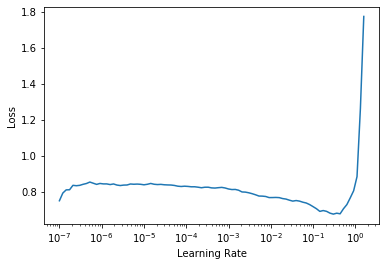

In [51]:
learn.lr_find()

In [52]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.259548,0.147408,0.940298,01:09


SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=2.75422871709452e-06)

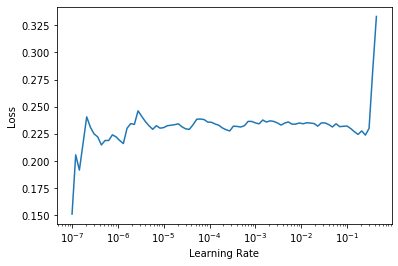

In [43]:
learn.freeze_to(-2)
learn.lr_find()

In [53]:
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.237888,0.139742,0.943661,01:10


SuggestedLRs(lr_min=0.03630780577659607, lr_steep=2.75422871709452e-06)

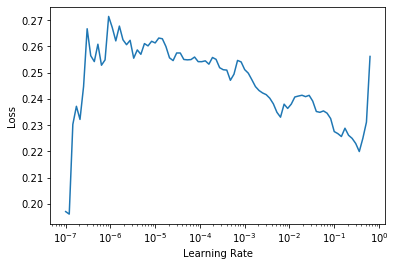

In [54]:
learn.freeze_to(-3)
learn.lr_find()

In [55]:
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.100695,0.085888,0.968185,01:51


SuggestedLRs(lr_min=0.0005248074419796466, lr_steep=3.981071586167673e-06)

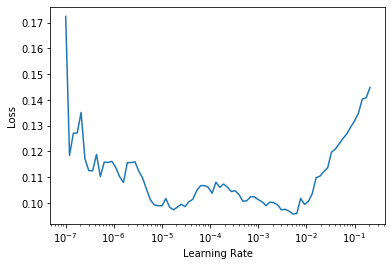

In [56]:
learn.unfreeze()
learn.lr_find()

In [57]:
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),3e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.090181,0.081527,0.969355,02:24
1,0.081151,0.080247,0.969648,02:31


In [58]:
learn.save('toxic_classifier_final_2018')

In [59]:
# Applying TTA
preds,targs = learn.tta()
accuracy(preds, targs).item()

0.9696475863456726

### Prediction on test set

In [32]:
learn.load('toxic_classifier_final_2018')

In [65]:
test_cls.head()

,text,label,is_valid
5,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,1
7,:Dear god this site is horrible.,0,1
11,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,0,1
13,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,1
14,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,1


In [42]:
# Creating a test dataloader using test_cls which was creted before
tst_dl = dls.test_dl(test_cls, with_labels=True)

In [34]:
tst_dl.show_batch(max_n=3)

,text,category
0,"xxbos xxunk xxunk xxup xxunk , xxunk , 5 , xxunk xxunk , 1200 , , xxup lo , xxunk , xxunk , 20 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , xxunk xxunk , 1800 , , xxup td , xxunk , xxunk , 25 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 , - xxrep 3 9 ,",0
1,xxbos xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup omfg xxup wtf xxup,0
2,"xxbos = = story of the one = = xxunk xxup ok xxup now xxup hear xxup me xxup out , xxup before xxup you xxup read xxup this i xxup just xxup want xxup you xxup to xxup know xxup that xxup in xxup my xxup life i xxup have xxup xxunk , xxup xxunk xxup that xxup most xxup every xxup one xxup already xxup knows xxup because xxup someone xxup has xxup to xxup go xxup around xxup and xxup tell xxup every xxup one … xxup it xxup all xxup started xxup back xxup when i xxup was xxup just a xxup little xxup over 6 xxup years xxup old xxup and xxup did n’t xxup know xxup any xxup thing xxup about xxup kissing xxup and xxup most xxup of xxup the xxup time , xxup well , i xxup was xxup just xxup xxunk",0


In [35]:
# Finding the accuracy of learner on this test set

# Method 1
learn.validate(dl=tst_dl)

(#2) [0.16375873982906342,0.9308837652206421]

In [ ]:
# Method 2
preds, targs = learn.get_preds(dl=tst_dl)
accuracy(preds, targs).item()